# MODEL FITNESS GYM: Customer Retention Study

## <u>Table of contents</u><a id='back'></a>
* [1. Preface](#preface)    
* [2. Exploratory Data Analysis (EDA)](#eda)
    * [2.1 Overview](#eda1)
    * [2.2 Feature Distribution - Churn vs Non-Churn](#eda2)
    * [2.3 Feature Correlation](#eda3)
* [3. User Churn Prediction Modelling](#model)
    * 3.1 [Logistic Regression](#model1)
    * 3.2 [Random Forest](#model2)
        * [Conclusions on Prediction Modelling](#model_conclusion)
* [4. User Clustering for User Churn & Retention](#cluster)
    * 4.1 [Hierarchical Clustering for n-clusters Estimation](#cluster1)
    * 4.2 [K-Means Modelling](#cluster2)
    * 4.3 [Visualizing Feature Distribution of User Clusters](#cluster3)
        * [Conclusion on User Clusters](#cluster_conclusion)
* [5. Recommendations](#recommendations)

# 1. Preface <a id='preface'></a>
One of the biggest challenges faced as a fitness institution is losing members who may have otherwise stayed with us for years. In other words, how do we determine when a customer has churned? This study's goal is to break down customer profiles and behavioural trends using historical data towards predicting churn rates and ultimately, construct a feasible customer retention strategy.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV as RSCV

In [2]:
# reading csv data

try:
    df = pd.read_csv('gym_churn_us.csv')
except:
    df = pd.read_csv('/datasets/gym_churn_us.csv')

# 2. Exploratory Data Analysis (EDA) <a id='eda'></a>

## 2.1 Overview <a id='eda1'></a>

In [3]:
display(df.head())
display(df.info(memory_usage='deep'))
display(df.describe())
df.shape

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


(4000, 14)

In [4]:
# Converting our columns to standardized casing:

df.columns = df.columns.str.lower()

In [5]:
# Checking for complete duplicates

df[df.duplicated()]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn


**Observations:**
1. Contract Period - The majority of our clients sign up for 1-6 months, with a smaller proportion on a 12 month contract. 
2. Age - The typical client are customers in the late 20s age range.
3. Average Additional Charges (total) - By glancing at our percentiles, we can spot some outliers in this column, with a 50th percentile of 136, 75th percentile of 210 and a maximum value of 552.
4. Lifetime - By looking at our 75th percentile value of 5, we can spot some obvious outliers of customers who have been with the gym for roughly 31 months. 
5. Avg weekly class frequency (overall and current month) - Some outliers are indicated by a maximum value of 6 compared to our 75th percentile value of 2.5.
6. No missing values were found.
7. No complete duplicates were found.

## 2.2 Feature Distribution - Churn vs Non-Churn <a id='eda2'></a>

In [6]:
# Observing average values for each column, grouped by churn status

df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Observations:**
By looking at averages between churn and non-churn customers, we can make a preliminary guess on churn-defining features.
1. Non-churn customers seem to be staying near our establshment's location by a slightly higher margin (about 10%) than non-churn customers. 
2. Roughly 53% of non-churn customers come from partner companies, compared to a 35% representation by churned customers.
3. A relatively notable share of non-churn customers (35%) were aquired via the 'bring-a-friend' promotion, compared to 18% share of churned customers. 
4. Contract lengths for non-churn customers are on average higher (5.7 months) compared to churned customers (1.7 months).
5. Nearly half of non-churn customers attend group sessions (group_visits) compared to churn customers at a ratio of 46% to 26%.
6. The typical age of non-churn customers is 30 years of age, 3 years older than that of churned customers.
7. Non-churn customers typically spend about 50% more than non-churn customers in extras over their lifetime.
8. Non-churn customers have a typically larger lifetime value (4.7 months to 1 month), ***indicating that the first month is the biggest time-based indicator in determining churn rates.***
9. Non-churn customers are on average visiting the gym twice in a week over the course of their lifetime and the most recent recorded month. This is in contrast to churned customers who on average visit the gym at a range of 1-2 sessions a week over their lifetime and just once in the most recently recorded month.

In [7]:
# defining a function to create barplots

def barplot_feature(data, feature, hue='churn', title='', xlabel='', ylabel='Count', rotation=0):
    sns.countplot(x=feature, hue=hue, data=data, palette=['#377EB8','#E41A1C'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.legend(['Non-Churn', 'Churn'])
    plt.tight_layout()
    plt.show()

In [8]:
# Defining a function to creates histograms

def stacked_histplot(data, feature, hue='churn', title='', xlabel='', ylabel='Count', bins=10, alpha=0.5, rotation=0):
    sns.histplot(data=data, x=feature, hue=hue, multiple='stack', 
                 kde=True, alpha=alpha, bins=bins, palette='Set1', label=['Churn', 'Non-Churn'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.legend(['Churn', 'Non-Churn'])
    plt.show()

In [9]:
# Getting a reference of baseline churn proportions
print("\033[1mBaseline Churn Proportions")
df["churn"].value_counts(normalize=True)

Baseline Churn Proportions


0    0.73475
1    0.26525
Name: churn, dtype: float64

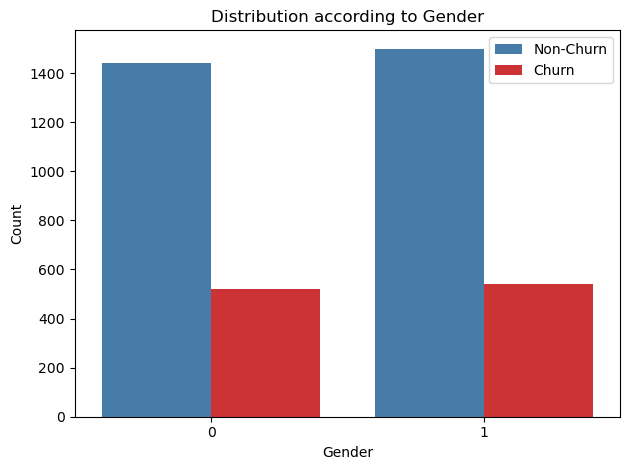

In [10]:
# Distribution of gender

barplot_feature(df, 'gender', title='Distribution according to Gender', xlabel='Gender')

**<u>Observations:<u/>** 
<br>Gender distribution across both churn and non churn groups are roughly similar and do not show a hugh disparity. ***We cannot say for certain if a particular gender potentiates more churn than the other.***

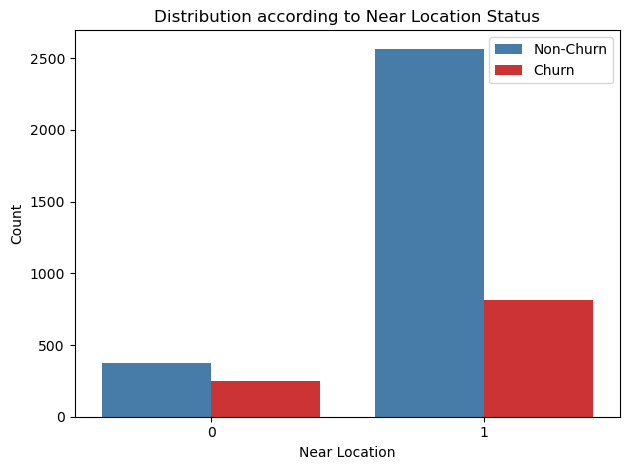

In [11]:
# Distribution of Near Location status

barplot_feature(df, 'near_location', title='Distribution according to Near Location Status', xlabel='Near Location')

**<u>Observations:<u/>** 
<br>There is a significant disparity in share-of-churn between customers who live/work near location and those who live/work further away, with the latter attaining a higher share-of-churn; it is worth highlighting the much smaller sample size of customers who fall into category of living/working further away from the gym's location. ***There is certainly a small degree of churn predicting trends here, but because of its small sample size, we cannot deem this as a great churn indicator.***

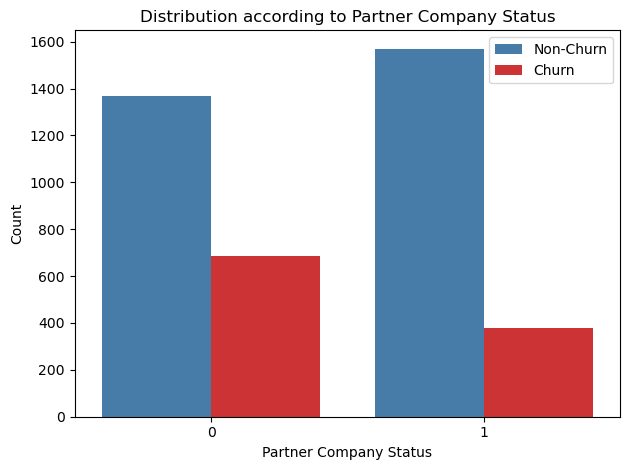

In [12]:
# Distribution of Partner status:

barplot_feature(df, 'partner', title='Distribution according to Partner Company Status', xlabel='Partner Company Status')

**<u>Observations:<u/>** 
<br>There is a noticeably lower churn rate for customers who signed up via a partner company versus those that did not. ***This could be a good indicator of churn.***

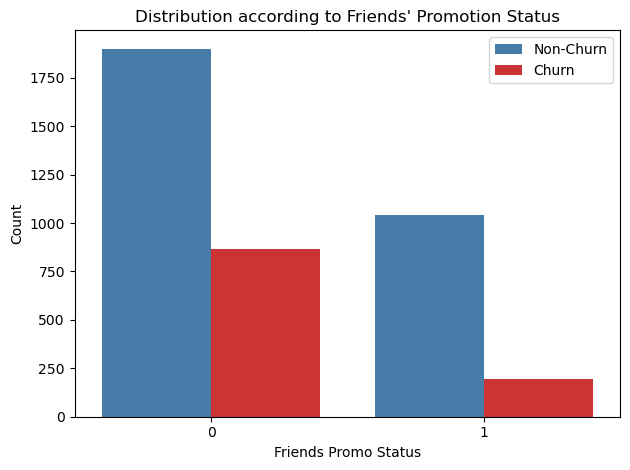

In [13]:
# Distribution of Friends Promotion status:

barplot_feature(df, 'promo_friends', title="Distribution according to Friends' Promotion Status", xlabel="Friends Promo Status")

**<u>Observations:<u/>** 
<br>With respect to share of churn, clients who signed up via the friend's promotion ended up churning less than those who took the normal route. ***However, overall sample size of both categories are largely different and should be noted accordingly***. 

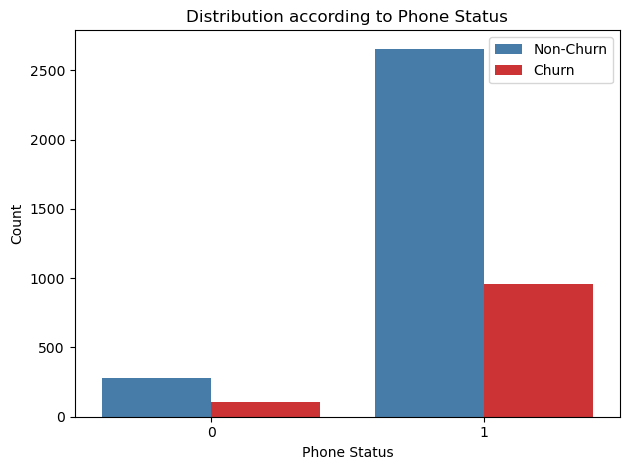

In [14]:
# Distribution of Phone number status:

barplot_feature(df, 'phone', title='Distribution according to Phone Status', xlabel='Phone Status')

**<u>Observations:<u/>** 
<br>There isn't much that stands out in Phone number status distribution. The sample size of customers who did not provide their phone numbers pale in comparison to those who did. Roughly 25-30% of those who provided their phone numbers ended up churning. ***We cannot say for certain if provision of a customer's phone number has any effect on churn.***

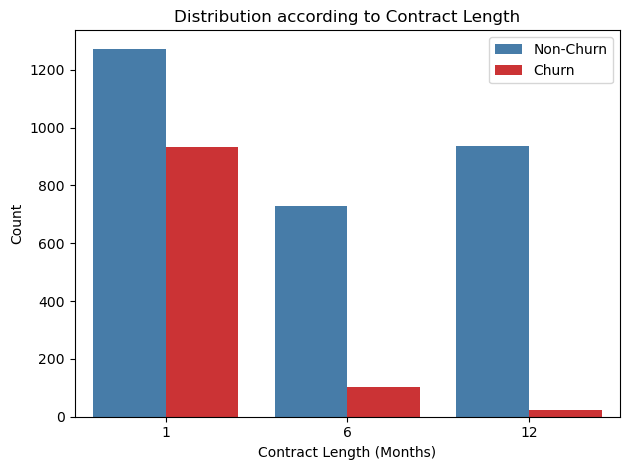

In [15]:
# Distribution of Contract Period between churn and non-churn clients

barplot_feature(df, 'contract_period', title='Distribution according to Contract Length', xlabel='Contract Length (Months)')

**<u>Observations:<u/>** 
<br>Almost half of customers who signed on a 1-month contract ended up churning. In contrast, churn rates decline substantially for contract lengths of 6 and 12 months respectively. It is worth noting the higher overall sample size of customers who signed up on a 1-month contract compared to the rest. This might indicate lots of newcomers to the scene or those who are unsure of their commitment to the lifestyle. Either ways, ***contract lengths of 1 month is paramount to understanding churn rates and how to improve retention.***

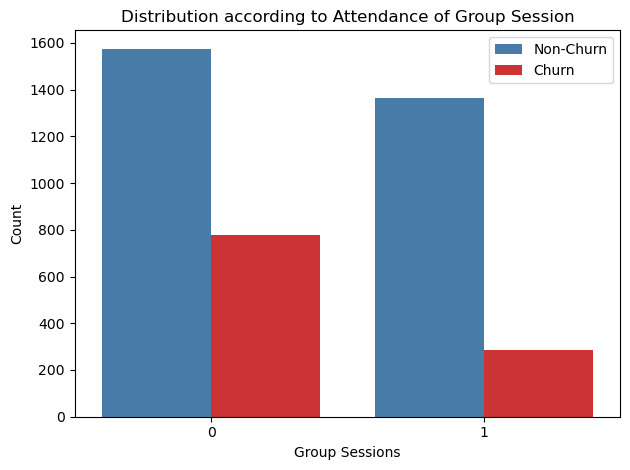

In [16]:
# Distribution of group visits between churn and non-churn clients

barplot_feature(df, 'group_visits', title='Distribution according to Attendance of Group Session', xlabel='Group Sessions')

**<u>Observations:<u/>** 
<br>Share of churn for customers who attend group sessions are much lower in comparison to those that do not. ***However, it is prudent to note the slighly bigger sample size of customers who fly solo.*** 

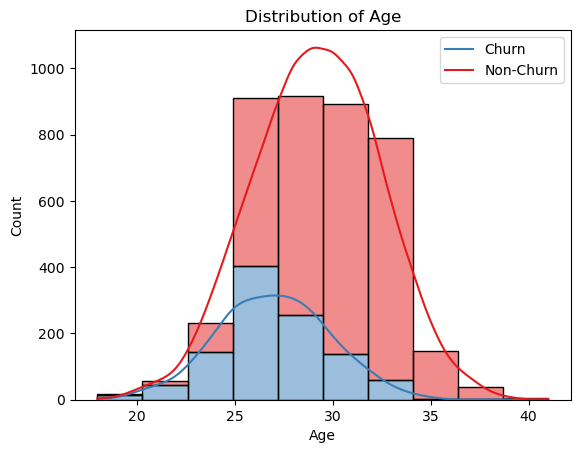

In [17]:
# Distribution of Age 

stacked_histplot(df, 'age', title='Distribution of Age', xlabel='Age')

**<u>Observations:<u/>** 
<br>We have a clear picture of demographics for customers who churned and those who did not. The most frequently observed age of churned customers are slightly lower than non-churn customers, with a range of roughly 25-29 years of age, compared to 28-31 years of age. **We may infer that the lower the age, the higher the chance of churn.**

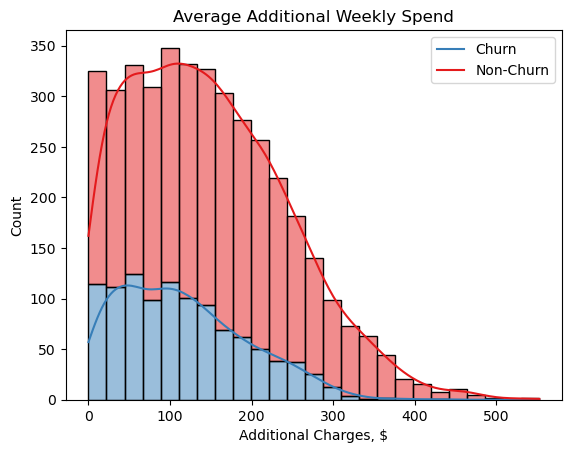

In [18]:
# Distribution of Average Additional Charges

stacked_histplot(df, 'avg_additional_charges_total', 
                 title='Average Additional Weekly Spend', xlabel='Additional Charges, $', bins=25)

**<u>Observations:<u/>** 
<br>There is a clear gap in additional weekly spend between churn and non-churn customers. The large majority of non-churn customers are spending in the range of \\$0 - \\$150 compared to the majority of non-churn customers, who spend on average \\$0 - \\$110. The overall total range of additional expenditure is also much larger for non-churn customers. ***This might indicate a disparity in spending power, and might correlate with our distribution of age.***

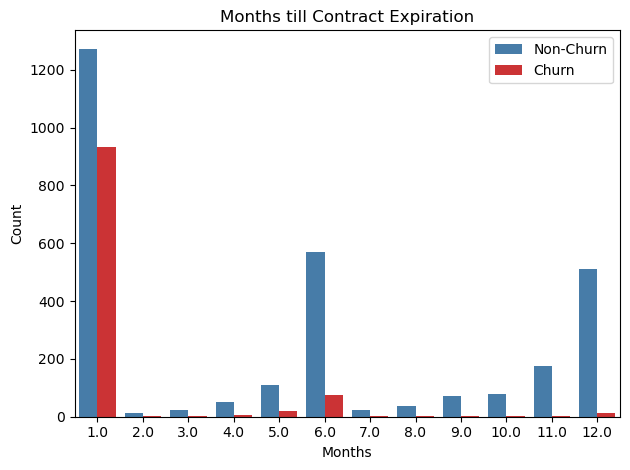

In [19]:
# Distribution of Average Additional Charges

barplot_feature(df, 'month_to_end_contract', title='Months till Contract Expiration', xlabel='Months')

**<u>Observations:<u/>** 
<br>The non-churn peaks at 1, 6 and 12 months indicate customers who might have just signed up for a contract. The churn peaks of 1, 6 and 12 (excluding the obvious smaller peak at 5 months) are also representative of contract length distribution. It isn't far-fetched to infer that customers who just signed up for a contract, irrespective of contract length, can churn immediately (within a few weeks to a month). Either ways, it is yet again the extremely high churn rates we observe at 1 month that is most interesting. Two things we can conclude about this observation; ***(1) A customer had signed up for a 1 month contract to test things out, only to churn thereafter. (2) A customer is at the tail-end of his/her contract and does not want to renew.*** 

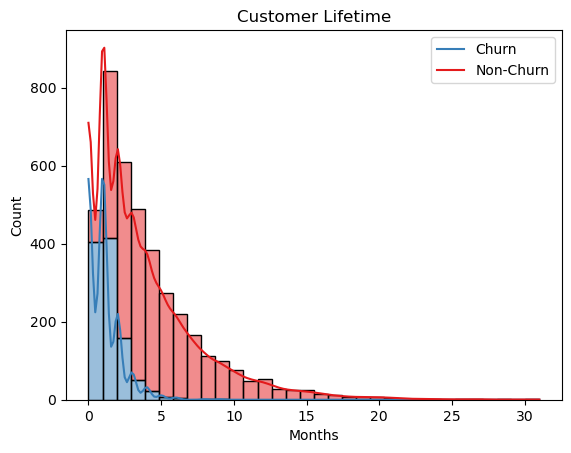

In [20]:
# Distribtion of Customer Lifetime

stacked_histplot(df, 'lifetime', title='Customer Lifetime', xlabel='Months', bins=32)

**<u>Observations:<u/>** 
<br>The majority of customers churn after the first month or the subsequent 2nd and 3rd month of multiple 1-month contracts. This confirms our bias, that most of our churned customers are those that are on 1-month contracts (or multiple iterations of 1-month contracts). We can't say for certain if this is because of financial factors or whether these customers are just uncertain of their own commitment to longer-term contracts. What we can somewhat confirm is that ***longer term customers are less likely to churn and perhaps indicates that churn rates aren't affected by the service and facilities provided, but other external factors.***

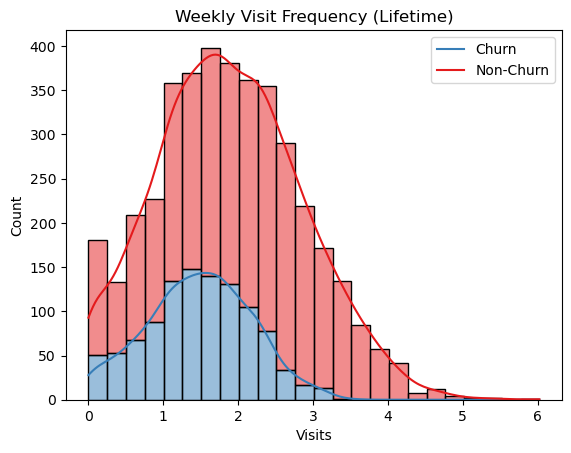

In [21]:
# Distribution of Visit Frequency (Lifetime)

stacked_histplot(df, 'avg_class_frequency_total', title='Weekly Visit Frequency (Lifetime)', xlabel='Visits', bins=24)

**<u>Observations:<u/>** 
<br>The lifetime weekly visit distribution of churned customers is somewhat normally distrbuted with a frequently observed range of 1-2 visits. Non-churn distribution takes a bit of a skewed shape with a frequently observed range of 1-2.5 visits with a good amount of customers visiting more often than that. ***There is a bit of an outlying attribute to non-churn distribution, which clearly depicts a subset of avid gym-goers.***

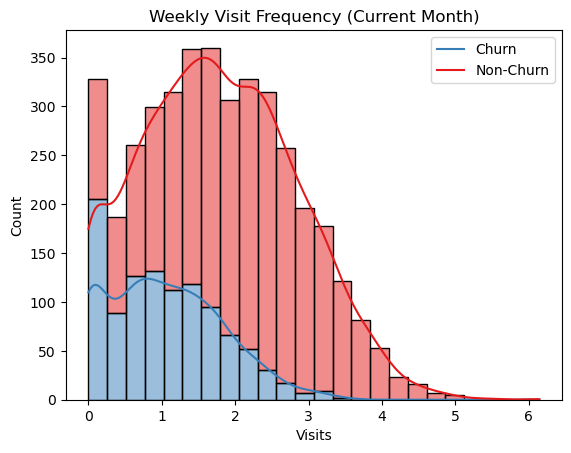

In [22]:
# Distribution of Visit Frequency (Current Month)

stacked_histplot(df, 'avg_class_frequency_current_month', 
                 title='Weekly Visit Frequency (Current Month)', xlabel='Visits', bins=24)

**<u>Observations:<u/>** 
<br>The overall shape of our distributions for weekly visits in the current month are quite similar between churn and non-churn customers. Both have clusters towards the left and are right skewed. Some key differences are that the majority of churned observations are clustered in the range of 0 - 1.75 visits while the large majority of non-churn observations are clustered in the range of 0 - 2.75 visits. ***Yet again, we see a subset of semi-outliers who can be considered gym rats, totalling more than 3 visits a week.***

[Back to Contents](#back)

## 2.3 Feature Correlation <a id='eda3'></a>

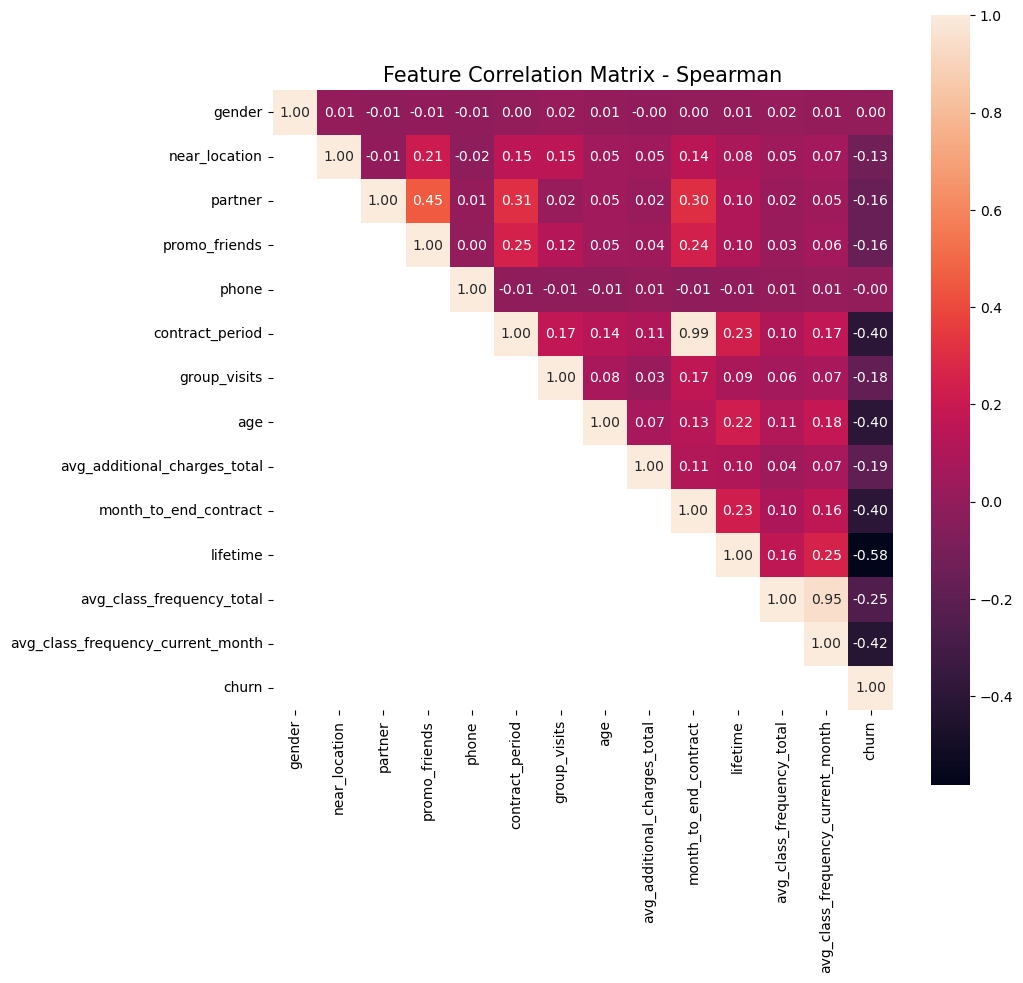

In [23]:
# Constructing a correlation matrix
cm_spear = df.corr(method='spearman')
n = cm_spear.shape[0]
mask = np.tri(n, k=-1, dtype=bool)
cm_spear = cm_spear.mask(mask)

# Converting correlation matrix into a heatmap
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

sns.heatmap(cm_spear, annot = True, square=True, fmt='.2f', ax=ax)
ax.set_title('Feature Correlation Matrix - Spearman', fontsize=15)
plt.show()

**<u>Observations on Feature Collinearity:<u/>** 
<br>While we can observe correlated feature-pairs that are similar in what they measure, it might not be prudent to remove one or the other as they all provide varying degrees of different information. A shrinking of coefficients may prove to be a better move.
<br><br>Regarding the highly correlated features of Contract Period and Month-to-End Contract: Contract length tell us about a particular customers long-term commitment, where a longer contract is likely to equate to a lower propensity to churn. The remaining months of a contract on the other hand is a short-term predictor, where a shorter remaining duration would most likely equate to higher churn rates than a contract with multiple remaining months to go. 
<br><br>Similarly, Average Weekly Visits (lifetime) is a strong predictor of retention rates; a customer who has shown in the past to visit the gym frequently is likely to do so in the future. Average Weekly Visits (current month) is more of a short term predictor, where customers who have decreased their average weekly visits are more likely to churn.

[Back to Contents](#back)

# 3. User Churn Prediction Modelling <a id='model'></a>

**<u>Section Breakdown</u>:**
1. We have selected **Logistic Regression** and **Random Forest** as our baseline for prediction of the binary classification type. Ultimately, we want to classify our customers into those who will churn and those who won't.
2. To circumvent potential scenarios of overfitting and multicollinear features with our Logistic Regression model, we will train two separate models; one with the baseline model and another that optimizes for L2 regularization. We will then compare metrics to determine if regularization is in fact necessary.
3. We will ultimately select our main model based on our calculated metrics.

In [24]:
# Function for printing metric results

def print_metrics(y_true, y_pred, y_proba, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    print()

## 3.1. Logistic Regression Model<a id='model1'></a>

In [25]:
# Splitting data
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Train-Test Split

# Standardizing data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

**<u>LOGISTIC REGRESSION BASE MODEL<u/>**

In [26]:
# Training the LR model
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train_st, y_train)

# Prediction and metrics on training set for evaluation purposes
y_pred_lr_train = model_lr.predict(X_train_st)
y_proba_lr_train = model_lr.predict_proba(X_train_st)[:,1]
print_metrics(y_train, y_pred_lr_train, y_proba_lr_train, 'LR Train Set Metrics')

# Prediction and metrics on validation set
y_pred_lr = model_lr.predict(X_test_st)
y_proba_lr = model_lr.predict_proba(X_test_st)[:,1]
print_metrics(y_test, y_pred_lr, y_proba_lr, 'LR Validation Set Metrics')

LR Train Set Metrics
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98

LR Validation Set Metrics
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97



**NOTE:** Our Logistic Regression metrics on both train and validation data are almost similar throughout. Our ROC_AUC score in particular is especially high, which is a good sign in distinguishing between positive and negative instances.

**<u>LOGISTIC REGRESSION MODEL WITH L2 RIDGE OPTIMIZATION<u/>**

In [27]:
# Determining optimal regularization strength using Grid Search Cross Validation

# Grid hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Training LR Model with Ridge regularization
model_lr_ridge = LogisticRegression(penalty='l2', random_state=0)

# GridSearchCV optimized for F1 score
grid_search = GridSearchCV(model_lr_ridge, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train_st, y_train)

# Get the best C value and corresponding score
best_c = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f'Best C value: {best_c}')
print(f'Best score: {best_score:.4f}')


Best C value: 100
Best score: 0.8668


In [28]:
# Training LR model, optimized for ridge regularization
model_lr_ridge = LogisticRegression(penalty='l2', C=100, random_state=0)
model_lr_ridge.fit(X_train_st, y_train)

# Prediction and metrics on validation set
y_pred_lr_ridge = model_lr_ridge.predict(X_test_st)
y_proba_lr_ridge = model_lr_ridge.predict_proba(X_test_st)[:,1]

print_metrics(y_test, y_pred_lr, y_proba_lr, 'LR Validation Set Metrics')
print_metrics(y_test, y_pred_lr_ridge, y_proba_lr_ridge, 'LR Ridge Validation Metrics')

LR Validation Set Metrics
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97

LR Ridge Validation Metrics
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97



In [29]:
# Checking coefficients of both models to ensure regularization was effected properly

print(model_lr_ridge.coef_)
print(model_lr.coef_)

[[-0.02323187 -0.08038544 -0.08758043 -0.30141669  0.01872624 -0.77687697
  -0.42015582 -1.15621784 -0.58666118 -0.52773715 -4.2384764   4.04706631
  -5.2813189 ]]
[[-0.01307937 -0.07564435 -0.0815124  -0.27567138  0.00490768 -0.71909489
  -0.39345268 -1.09143144 -0.55216408 -0.53402553 -3.84628138  3.29978832
  -4.45423124]]


**NOTE:** Our regularized model had no effect whatsoever on our overall metrics, and thus multicollinearity should not be an issue at this point in time. Moving forward, we will be using the results of our baseline Logistic Regression model.

[[574  28]
 [ 34 164]]


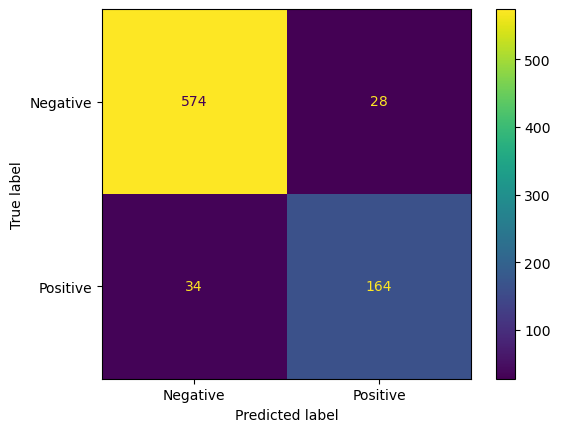

In [30]:
# Visualizing our model's confusion matrix

c_matrix = confusion_matrix(y_test, y_pred_lr_ridge)

print(c_matrix)

display_c_matrix = ConfusionMatrixDisplay(c_matrix, display_labels=["Negative", "Positive"])

display_c_matrix.plot()
plt.show()

**Observations:** With our confusion matrix for Churn/Non-churn classes, we clearly see a larger proportion of True Negative (Yellow cell) observations who did not churn. Proportions for True Positive churn classes aren't ideal, but they are still acceptable all things considered. 

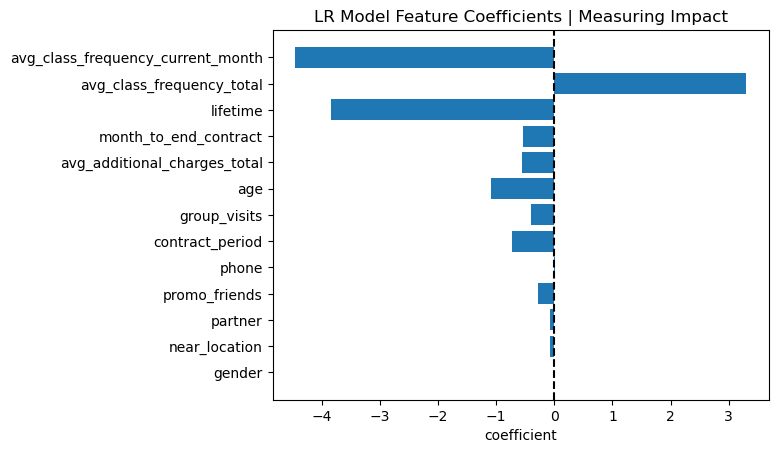

In [31]:
# Visualizing the best Churn indicators by their impact/coefficients suggested by our model

# Get the coefficients of the model
coef_ = model_lr.coef_[0]

# Get the columns labels as a list
labels = df.columns.to_list()[:-1]

# Create a vertical bar plot of the features and their model coefficents
plt.barh(labels, coef_)
plt.axvline(color="black", linestyle="--")
plt.title("LR Model Feature Coefficients | Measuring Impact")
plt.xlabel("coefficient");

**Observations:** Our churn predictors with the biggest impact are (1) Average weekly visits for the current month, (2) Average weekly visits over lifetime and (3) Lifetime values of a customer. Amongst our average weighted features, (4) age was our best indicator.

[Back to Contents](#back)

## 3.2. Random Forest Model<a id='model2'></a>

In [32]:
## Baseline RF Model

# Training our Baseline RD model
model_rf = RandomForestClassifier(n_estimators = 100, random_state=0)
model_rf.fit(X_train_st, y_train)

# Baseline Model Prediction
y_pred_rf = model_rf.predict(X_test_st)
y_proba_rf = model_rf.predict_proba(X_test_st)[:,1]

In [33]:
## Optimized RF Model

# Hyperparameter tuning for our RF Model
param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8],
              'random_state': [0]}
        
# Training our Optimized RF Model - Using Random Search CV (RSCV)
model_rf_opt = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train_st, y_train)
model_rf_opt = model_rf_opt.best_estimator_

# Optimized Model Prediction
y_pred_rf_opt = model_rf_opt.predict(X_test_st)
y_proba_rf_opt = model_rf_opt.predict_proba(X_test_st)[:,1]

In [34]:
# Comparing metrics for baseline and optimized RF models

print_metrics(y_test, y_pred_rf, y_proba_rf, title='Baseline Random Forest Metrics') # Baseline RF model
print_metrics(y_test, y_pred_rf_opt, y_proba_rf_opt, title='Optimized Random Forest Metrics') # Optimized RF model

Baseline Random Forest Metrics
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97

Optimized Random Forest Metrics
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97



**Observations:** Our optimized RF Model is clearly better, especially on the Recall metric. We will be using this for comparisons with our LR model.

In [35]:
# Comparing Metrics between RandForest and LogRegression models

print_metrics(y_test, y_pred_lr, y_proba_lr, title='Logistic Regression Metrics') # LR model
print_metrics(y_test, y_pred_rf_opt, y_proba_rf_opt, title='Optimized Random Forest Metrics') # RF model

Logistic Regression Metrics
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97

Optimized Random Forest Metrics
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97



**Observations:** The optimized Random Forest model performs marginally better in both the Acuracy Score and F1 score compared to our Logistic Regression model.

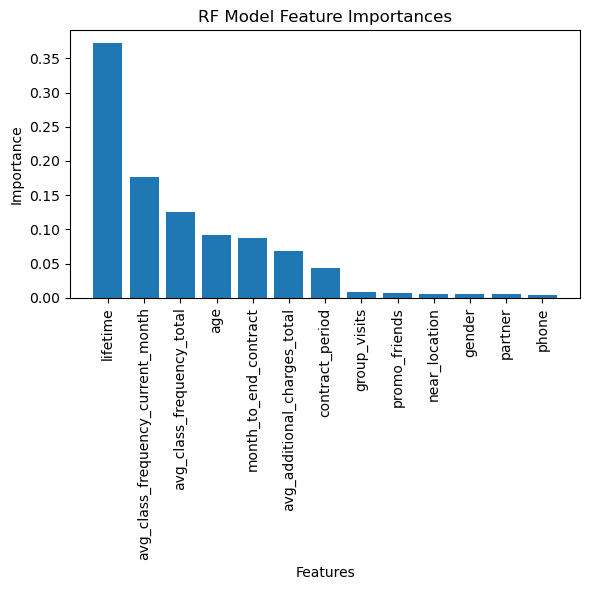

In [36]:
# Visualizing feature importance
importances = model_rf_opt.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,6))
plt.bar(range(X_train_st.shape[1]), importances[indices])

plt.title("RF Model Feature Importances")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

**Observations:** Similarly to our feature impact plot for our Logistic Regression model, (1) lifetime, (2) average weekly visits (current month), (3) average weekly visits (lifetime) and (4) age are our top weighted features. One key difference however, is that Lifetime is our MOST important feature by a substantial margin.

## Conclusions on Predictive Modelling<a id='model_conclusion'><a/>
Evaluation results between training and validation data were found to be minimal in difference, and thus we have confidence in having avoided underfitting and overfitting of our dataset. 
    
**Model Selection**: Our Random Forest model had similar ROC-AUC scores with our Logistic Regression model, but had marginally better Accuracy scores, Recall scores and overall F1 scores. Both models had extremely similar rankings of feature importance (feature weightages), with one key difference. Instead of average weekly visits having the biggest impact for the LR model, our RF model's biggest impact feature was lifetime, which has the most obvious and apparent predictive value. As an example, a customer who has been with the gym for just over a month has much higher relative potential to churn as someone with over 2 years of lifetime values. 
   
**Conclusion:** Random Forest will be used to predict future churn rates.
   

[Back to Contents](#back)

# 4. User Clustering for User Churn and Retention <a id='cluster'><a/>

**<u>Section Breakdown</u>:**
<br>
We have established an accurate predictive model, and subsequently need to be able to perform customer segmentation based on the various attributes and features such as age, gender, gym usage patterns and so on. This will allow us to understand our customer base and therefore tailor make marketing and retention strategies to specific groups that warrant them. 
<br>
Framework:
1. Perform hierarchal clustering to get an estimate of optimal clusters 
2. Make a predictive model using the K-Means algorithm based on a range of n-cluster values. 
3. Calculate Inertia and Silhouette Scores for each iteration of n-clusters
4. Determine the optimal clusters for K-Means computation based on the scores

## 4.1. Hierarchical Clustering for n-clusters Estimation<a id='cluster1'><a/>

In [37]:
# Standardizing our features

scaler = StandardScaler()

X = df.drop('churn', axis=1)
X_st = scaler.fit_transform(X)

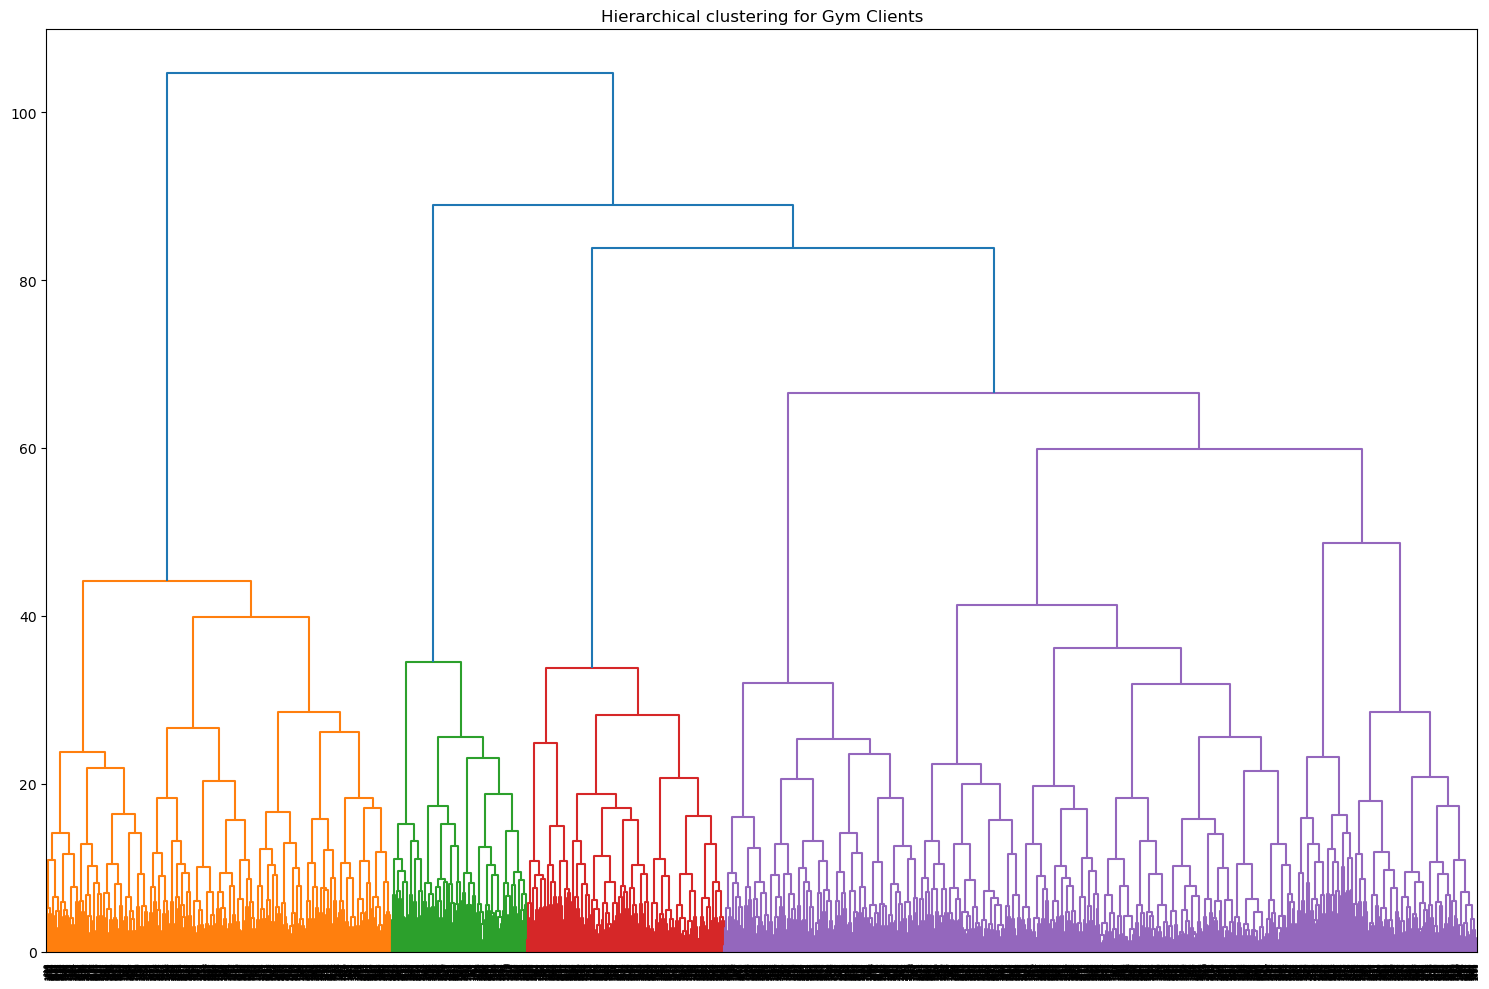

In [38]:
# Creating a linkage matrix of features
linkage_matrix = linkage(X_st, method='ward')

# Constructing a dengogram of our linkage matrix
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, orientation='top')
plt.title('Hierarchical clustering for Gym Clients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

**Observation:** The optimal number of clusters was suggested to be 4 by our dendogram. We will use this as a baseline and calculate the Inertia and Silhouette Score for range of 2 - 10 clusters. We will perform this over 20 iterations to ensure robustness of the model.

[Back to Contents](#back)

## 4.2. K-Means Modelling <a id='cluster2'><a/>

In [39]:
# Creating a function that calculates k-means for cluster range of 2-10 clusters

def kmeans_clustering(X, n):
    inertias = []
    silhouette_scores = []
    for i in range(n-2, n+7):
        km = KMeans(n_clusters=i, n_init=20, random_state=0)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))
    return [round(inertia, 2) for inertia in inertias], [round(silhouette, 2) for silhouette in silhouette_scores]

Inertias: [43975.01, 40164.88, 37258.07, 34685.98, 32977.86, 31697.74, 30649.32, 29683.04, 28774.02]
Silhouette Score: [0.16, 0.13, 0.13, 0.14, 0.13, 0.13, 0.13, 0.12, 0.12]


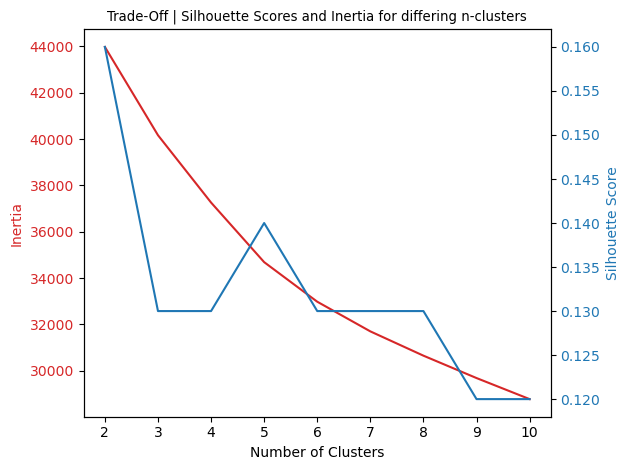

In [40]:
# Visualizing the various inertia and silhouette scores as data points on a dual-axis line plot

inertia_score, sil_scores = kmeans_clustering(X_st, 4)  # Assigning list of scores into separate variables
print("Inertias:", inertia_score)
print("Silhouette Score:", sil_scores)

n_clusters = range(2, 11)

fig, ax1 = plt.subplots()

ax1.set_title('Trade-Off | Silhouette Scores and Inertia for differing n-clusters', fontsize=9.5)

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(n_clusters, inertia_score, color=color) # Assigning range of clusters to x-axis, inertia values to the LEFT y-axis
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(n_clusters, sil_scores, color=color) # Assigning range of clusters to x-axis, silhouette scores to the RIGHT y-axis
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


**Observations:** Our optimum number of clusters according to the silhouette score is n=5, which conincides with the elbow point of our Inertia plot.

In [41]:
# Training our K-Means model

km = KMeans(n_clusters=5, n_init=20, random_state=0)
labels = km.fit_predict(X_st)

df['user_cluster'] = labels   # assigning our labels to our DataFrame

In [42]:
# Getting a preliminary view on churn-affecting features, grouped by user clusters and sorted by churn rates

(df.groupby('user_cluster').mean()).sort_values(by='churn')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
user_cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263


In [43]:
# Replacing user clusters by their ascending order: 1 - low churn, 5 - high churn

churn_rates = df.groupby('user_cluster')['churn'].mean()
sorted_clusters = churn_rates.sort_values().index
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted_clusters)}
df['user_cluster'] = df['user_cluster'].replace(cluster_mapping) + 1
(df.groupby('user_cluster').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
user_cluster,,,,,,,,,,,,,,
1,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
2,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019
3,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
4,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
5,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263


**Observations:**
1. Contract period, group_visits, age, avg_additional_charges, month_to end_contract, avg_class_frequency_total, avg_class_frequency_current month are the most nuanced in terms of churn rate affecting features. But we will look at all features in more detail subsequently.
2. Additionally, clusters 4 and 5 are the most likely to churn with average churn rates of 44% and 51% respectively between both clusters. Cluster 3 has a one in four chance of churning, wihle clusters 1 and 2 have the least likelihood of churning at 2% and 6% respectively.

[Back to Contents](#back)

## 4.3. Visualizing Feature Distribution of User Clusters <a id='cluster3'><a/>

**N/B:** User Clusters are sorted in ascending order by least churn-rate, **1** to highest churn rate, **5**. 

In [44]:
# Reference

reference_churn_groups = df.groupby('user_cluster')['churn'].mean() * 100
print("Churn Rates")
print(reference_churn_groups.map('{:.2f}%'.format))

Churn Rates
user_cluster
1     2.77%
2     6.80%
3    26.75%
4    44.36%
5    51.43%
Name: churn, dtype: object


In [45]:
# defining a function for barplots

def barplot_feature_cluster(data, feature, hue='user_cluster', rotation=0):
    sns.countplot(x=feature, hue=hue, data=data, palette='flare')
    plt.title(feature)
    plt.xticks(rotation=rotation)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})
    plt.tight_layout()
    plt.show()
    
# defining a function for stackplots    
def stacked_histplot_cluster(data, feature, hue='user_cluster', bins=10, alpha=0.5, rotation=0):
    sns.histplot(data=data, x=feature, hue=hue, multiple='stack', edgecolor='black', linewidth=0.5, 
                 kde=True, alpha=alpha, bins=bins, palette='flare')
    plt.title(feature)
    plt.xticks(rotation=rotation)
    plt.show()

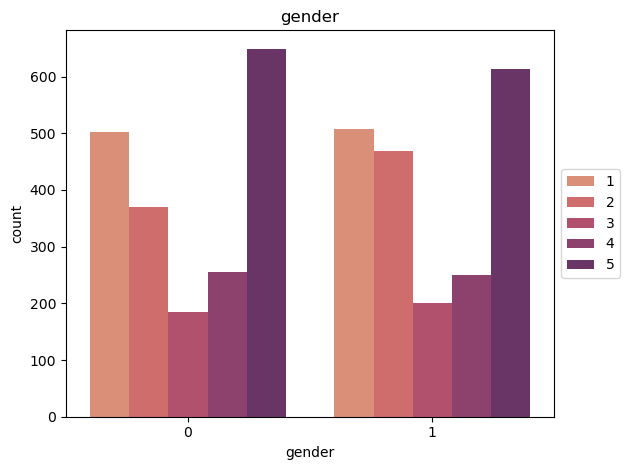

In [46]:
# Feature - Gender
barplot_feature_cluster(df, 'gender')

**Observation:** There aren't any discernible difference between genders regarding churn rates.

[Back to Contents](#back)

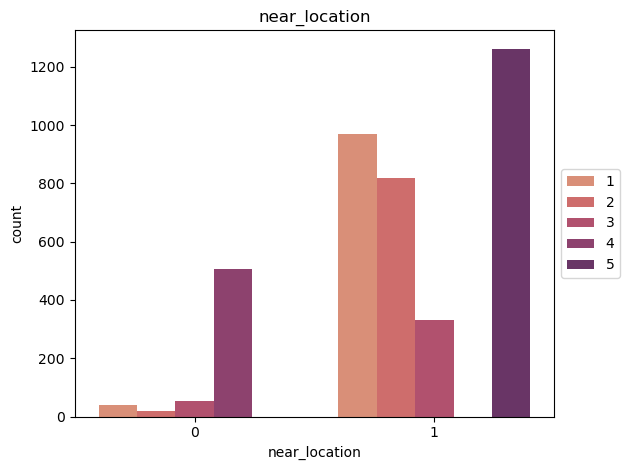

In [47]:
# Feature - Near_location
barplot_feature_cluster(df, 'near_location')

**Observation:** Yet again, note the difference in sample sizes between those who live/work near and far from location. Having said that, ***those that live/work further from location are most likely to churn.*** 

[Back to Contents](#back)

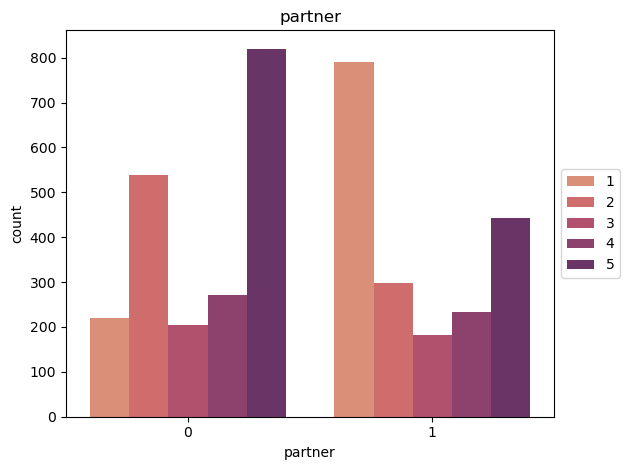

In [48]:
# Feature - Partner
barplot_feature_cluster(df, 'partner')

**Observation:** Users of the company-partner membership status are less likely to churn (as seen in cluster 1) with churn rates increasing dramatically for non-partner membership users (cluster 5). Interestingly, there is a notable share of cluster 5 users who are part of the partner membership status. ***Non-Partner membership users should be targeted with retention marketing strategies.*** 

[Back to Contents](#back)

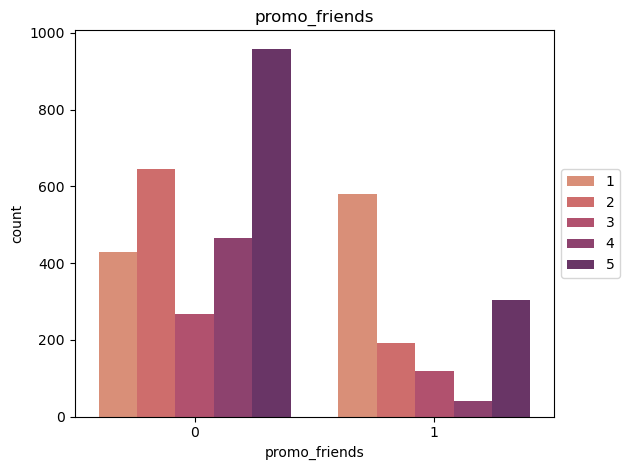

In [49]:
# Feature - Promo_friends
barplot_feature_cluster(df, 'promo_friends')

**Observation:** Not surprisingly, clusters of low churn rates (2% and 6%) significantly outclassed clusters that churned at a high rate. In contrast, high churn rate clusters (44% and 51%) of users who were not on the friend's promotion dominated the distribution. ***The friend's promotion has clearly been working out well, and we need to be able to create better value for the alternate user group.*** 

[Back to Contents](#back)

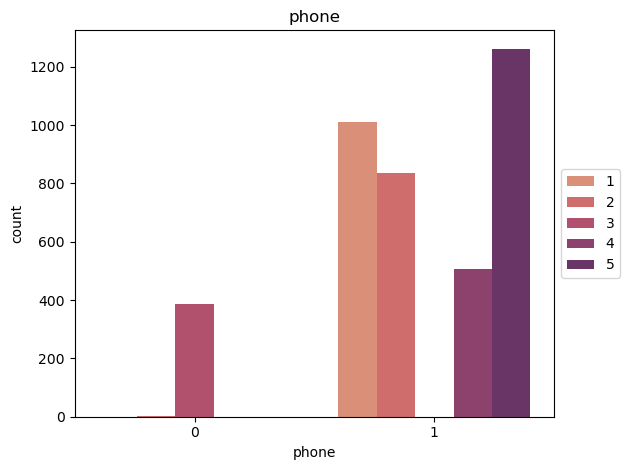

In [50]:
# Feature - Phone status
barplot_feature_cluster(df, 'phone')

**Observation:** This one is clear, in that the sample size for user who did not provide their phone information is too small to provide any clear observations on churn rates, though it should be noted from what data we have, cluster 3 (25% churn rates) dominated the distribution.

[Back to Contents](#back)

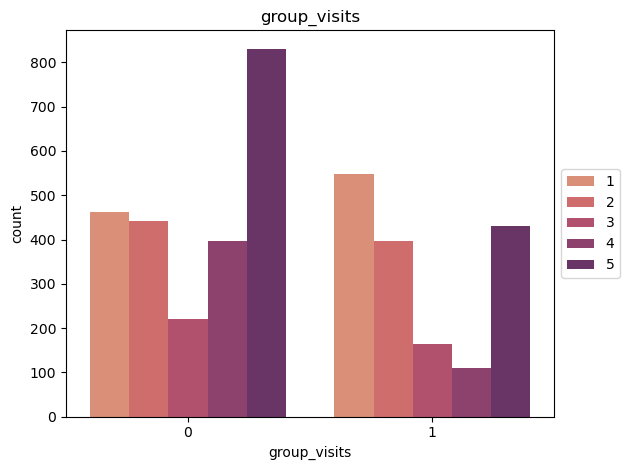

In [51]:
# Feature - Group_visits
barplot_feature_cluster(df, 'group_visits')

**Observation:** Distributions of high churn clusters 4 and 5 for user groups who attend group sessions are significantly lower than those who fly it solo. There are some obvious social constructs to why this happens, like social integration and motivation in a social setting. **Participation in group sessions has a clear and profound impact on retention/churn rates, and should be included as a key focus of any marketing plan.**

[Back to Contents](#back)

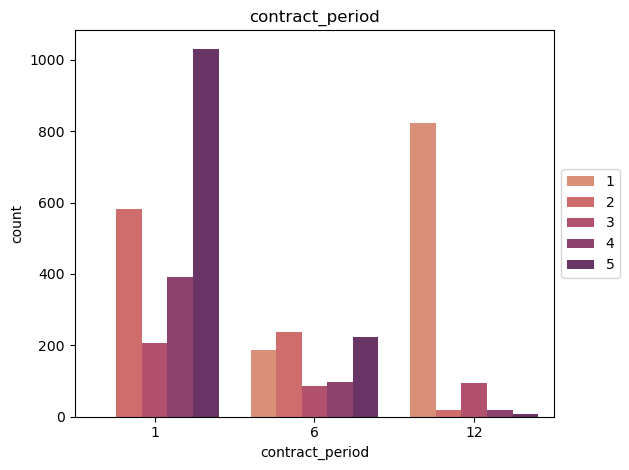

In [52]:
# Feature - Contract Period
barplot_feature_cluster(df, 'contract_period')

**Observation:** Users on a 12-month contract churned significantly less overall. It was clear from the start that users on 1-month contracts churned at significantly higher rate than anyone else, and this is evident again here. Users on a 6 month contract roughly evens out, with slightly better low churned-rate clusters over high churn-rate clusters. The obstacle here is converting a portion of 1-month contracts into 6 months contracts. **Contract period is crucial in determining and circumventing churn.**

[Back to Contents](#back)

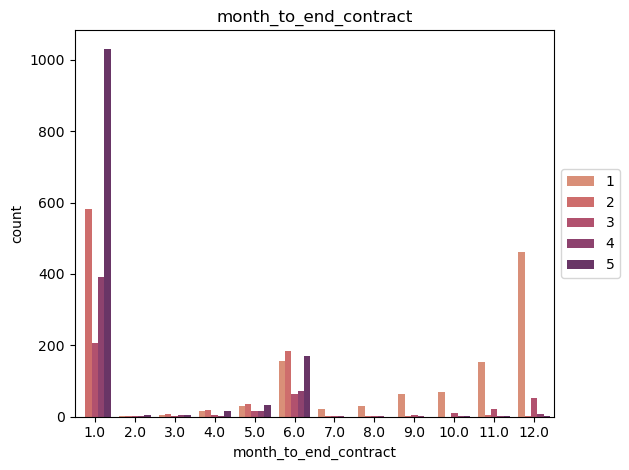

In [53]:
# Feature - Month to end contract
barplot_feature_cluster(df, 'month_to_end_contract')

**Observation:** Similar to all other analysis on contract lengths, users with a remaining contract period of 1-month churn significantly higher than any other groups. Interestingly, Cluster 1 is almost non-existent on our plot for the 1-month group. Clusters with high retention rates increase at a steady rate (disregarding the 6-month group) together with longer remaining contract periods. In contrast and disregarding the 1-month period, high churn rate clusters are kept to a minimal. **As iterated previously, a 1-month remainder of contract period is a pre-cursor to churn and should be a key target of focus.**

[Back to Contents](#back)

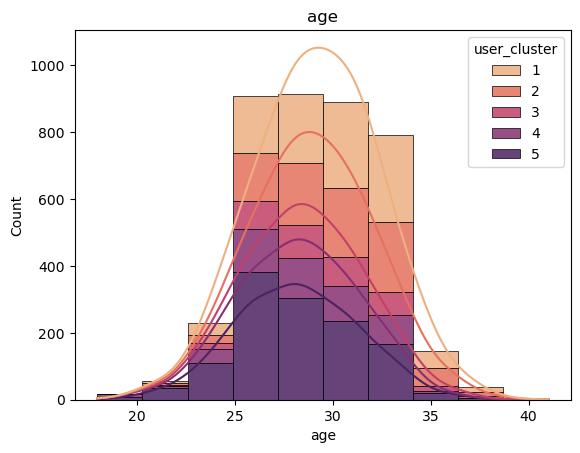

In [54]:
# Feature - Age
stacked_histplot_cluster(df, 'age', bins=10, alpha=0.85)

**Observation:** Focusing in on the cluster of data of our normally distributed curve from the ages of 25-34 - the older the user groups gets, we observe a decrease in high-churn cluster proportion share. **Age is definitely a big indicator of churn, whereby the younger the user base, the higher the churn.**

[Back to Contents](#back)

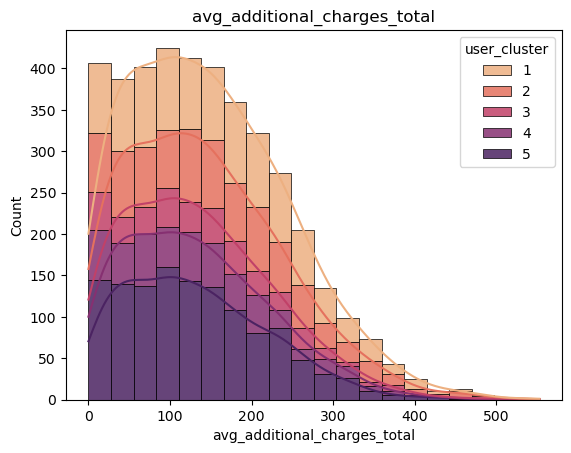

In [55]:
# Feature - Average Additional Weekly Charges 
stacked_histplot_cluster(df, 'avg_additional_charges_total', bins=20, alpha=0.85)

**Observation:** **Low-churn clusters are generally spending more on average compared to high-churn customers**. This is represented by the much larger (and wider) peaks of clusters 1 and 2, compared to those of clusters 4 and 5. All clusters generally spend roughly within the \\$0-\\$200 mark before gradually declining. Low-churn clusters also have a tendency and capacity to spend way more above the average, indicated by the heavy skew to the right. 

[Back to Contents](#back)

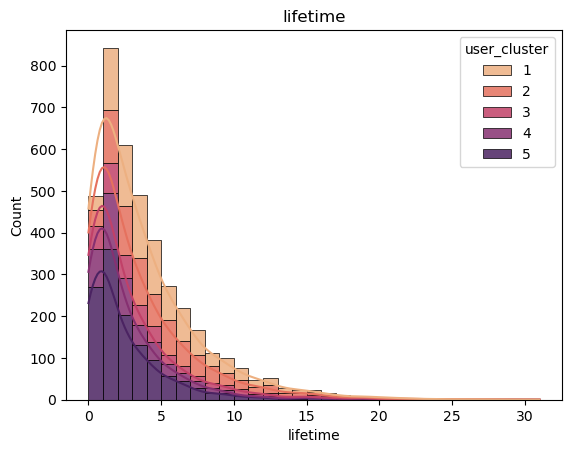

In [56]:
# Feature - Lifetime
stacked_histplot_cluster(df, 'lifetime', bins=31, alpha=0.85)

**Observation:** Our highest peak of 2 months represents the typical lifetime value of most customers. Overall, all clusters follow a similar shape throughout the plot, apart from a few notable exceptions. Firstly, as seen in our first 2 lifetime groups, proportion share of high-churn clusters are represented the most here compared to other lifetime groups. Secondly, the much larger (and wider) peaks of non-churn clusters, coupled with a more gradual and flatter decline indicates a less likelihood to churn the longer a particular customer has been a member of the gym. **Lifetime values are a great indicator of churn, as it indicates whether a customer has been with us for awhile and hence, is content with the services and facilities, or opposingly if a particular customer is new/in the trying-out phase, of whom have a higher propensity to churn.**

[Back to Contents](#back)

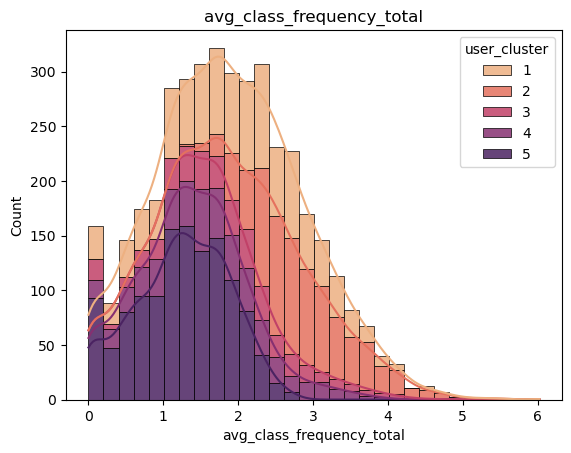

In [57]:
# Feature - Average Weekly Visits (lifetime)
stacked_histplot_cluster(df, 'avg_class_frequency_total', bins=30, alpha=0.85)

**Observation:** Average weekly visits for high-churn clusters hover roughly between 1-2 visits per week, rarely surpassing the 3 visit mark. In contrast, average weekly visits for low-churn clusters hover around the 2 visit mark, with a substantial propotion of its user surpassing the 3 visit mark. **We can conclusively say that higher average visits over a customer's lifetime indicates a willingness to commit to the lifestyle, of which leads to lower churn rates/higher retention (and vice-versa for low visit volume).**

[Back to Contents](#back)

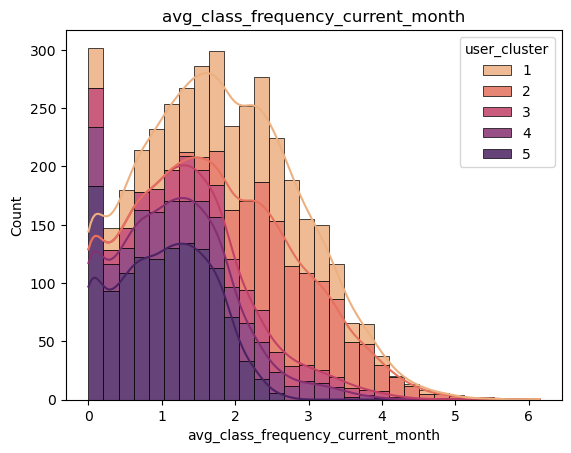

In [58]:
# Feature - Average Weekly Visits (current month)
stacked_histplot_cluster(df, 'avg_class_frequency_current_month', bins=30, alpha=0.85)

**Observation:** The distribution curve looks almost similar to prior distribution on lifetime values, apart from the large cluster at around the 0 average weekly visit mark. We may infer that these customers are those that had just joined, or they may be customers who had a change in their behaviours due to unknown factors and are showing indications of churn. **Either ways, analyzing average weekly visits in the most recent month can allow us to spot and categorize customers with less than 1 weekly average visits as high-potential churn users.** 

## Conclusions on User Clusters <a id='cluster_conclusion' ><a/>
By performing K-Means clustering, we were able to identify user clusters of various features that describe future users in terms of their likelihood to churn. Clusters 1 and 2 were our best performing groups of users with high retention rates. Cluster 3 was middling in the pack, with 1 in 4 users (24%) churning. Clusters 4 and 5 were our groups of high-churn rates, averaging 44% and 51% respectively. 
<br><br>The below are features that decribe the profile of users from cluster 4 and 5, of whom have a higher propensity to churn. They will be described as our **TARGET CLUSTER**, as they are the clusters to target in marketing initiatives towards reducing churn rates and boost overall retention:

* Though small in sample size, the majority of users that belonged to the category of **living/working far away from location** ended up in our target cluster.    
* A large proportion of our target cluster belong to user groups that were not part of a **partner-company membership**.
* In terms of relative share of proportion, the **friends promotion** had a great effect in retaining users. In contrast a large share of proportion of users not on the friends promotion ended up in our target cluster.
* Participation in **group sessions** had a distinct impact in churn rates. A large share of proportion of user who did not participate in group sessions ended up in our target cluster.
* Regarding **contract periods**, the largest proportion share of our target cluster was found in the 1-month category. In fact, a large proportion of our overall users are found in the 1-month category. A lot of this could be due to users signing up for a trial run, or an inability financially to commit to longer term plans. Either ways, we need to dial down on this category of users with respect to reducing churn rates as longer term contracts seemed to fare much better.
* Regarding **months till expiration of contract**, yet again we see similar trends of finding most of user base with 1-month remaining on their contracts. Similarly, most of our target cluster are found here. The 1-month landmark should then be an obvious cue for us to be targeting these users for an extension.
* As for **age**, younger customers are found more prevalently in our target cluster, with older ones much easier to retain. Again, this might be down to financial capabilities.
* Our target cluster seemed to spend about a third less on average than others on **extra services and items** like beverages. Perhaps again, this might boil down to affordabilty. If a user is not experiencing the full effects of what our establishment can offer, it might be boil down to affordability of our extras too.
* Regarding **lifetime** data, those who have been a member for longer lifetime values seem to churn less. This boils down to the commitment factor, which is apparent here. Strikingly, most of our target cluster is found at minimal lifetime values. Targeted re-engagement would prove fruitful to reinforce brand salience.
* In terms of **weekly visits over user lifetime**, our target cluster is averaging between 1-2 visits a week, compared to our high-retention users who average 2 and slightly more visits a week.
* In terms of **weekly visits over the current month**, the same conclusions stand (as per weekly visits over lifetime), apart from the large amounts of users who averaged close to 0 visits a week. This is important, as it allows us to determine the likelihood of churn, as a large majority of this category ended up in our target cluster.
    

[Back to Contents](#back)

# 5. Recommendations <a id='recommendations'><a/>

1. **<u>Personalization<u/>** - Personalized customer engagement involves tailoring our communication to the customer at hand. An example would be targeted email marketing towards customers who are approaching the end of their contracts, offering a additional 3 months of free membership upon renewing for a 12-month contract. We could also give out birthday discounts where customers are entitled to a free beverage and deep-tissue massage session on the week of their birthday. Tailoring our marketing communication to the specific customer helps to build long-term rapport.
2. **<u>Digital Engagement<u/>** and Brand Reinforcement - This involves tailoring our message across digital communication to target specific subsets of the demographic. For example, we found that the younger crowd were churning at a higher rate than older ones. We could create content across our social media that would identify with the younger generation, reminding them about the effects of good health and the benefits of fitness. Apart from that, there may be a subset of users who find themselves lost in the grand scheme of things regarding fitness and health. Our socials platforms are a way to alleviate these concerns, with short tutorials on exercise movements and diet. 
3. **<u>Incentives and Promotions<u/>** - Our highest retention rates were found in users that were on company-partner rates and friend's promotion rates. We don't just want to encourage sign-ups, but also retention of these customers. We want them to get the experience to full extent of our facilities and services. Example, customers can be entitled to a couple of free sessions with a qualified personal trainer upon signing up, just to kick things off. We also found that users who attended group sessions ended up churning less. Hence, we may want to provide incentives for users to try a class out and give them a taste of what it is like being in a group setting. The social aspect of fitness can be a powerful motivator.


[Back to Contents](#back)